In [17]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Notes:
    
    1. Read all csv files and combine to a single csv file
    2. Create a new column based using lamda function
    3. Use pd.cut() to numeric data to categorical/bin, convert ctegorial data to fload
    4. pd.pivot_table
    5. Export data frame to a csv file.   
    

In [18]:
%pwd

'/mnt/c/Users/whzemuch/Desktop/Islets_GSIS'

In [19]:
path = r'.'
filenames = glob.glob(path + "/*.csv")
filenames

['./ECM-C_IMG_4042_Results.csv',
 './ECM-N_IMG_4040_Results.csv',
 './export_islets_EIN_detail.csv',
 './export_islets_EIN_summary.csv',
 './TCP-C_IMG_4038_Results.csv',
 './TCP-N_IMG_4036_Results.csv']

In [20]:
lst = []
for filename in filenames:
    df = pd.read_csv(filename)
    lst.append(df)
# lst

In [21]:
# combine all csv file
df_all = pd.concat(lst, axis=0, ignore_index=True)
# df_all

/home/whzemuch-think/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [22]:
# calculate the size of islets
df_1 = df_all.assign(Size = lambda x: (x['Major'] + x['Minor'])/2)
df = df_1.copy()

In [23]:
# Calculate the EIN (Count)
bins = [50, 101, 151, 201, 251, 301, 351, 401, np.inf]
eins = [0.167, 0.648, 1.685, 3.500, 6.315, 10.352, 15.833, 22.750]
df["EIN"] = pd.cut(df['Size'], bins, labels=eins) 
df


,,Angle,Area,EIN,Group,Group.1,Label,Major,Max,Mean,Min,Minor,Perim.,Size
0,1.0,61.273,14395.393,0.648,NaN,NaN,ECM-C_IMG_4042.JPG:1046-1551,150.598,254.0,235.247,201.0,121.707,455.796,136.1525
1,2.0,72.961,28886.756,3.500,NaN,NaN,ECM-C_IMG_4042.JPG:1098-1529,281.113,253.0,235.844,195.0,130.836,707.140,205.9745
2,3.0,118.478,15930.902,0.648,NaN,NaN,ECM-C_IMG_4042.JPG:1117-1576,162.124,255.0,246.488,214.0,125.113,473.012,143.6185
3,4.0,142.779,23800.384,1.685,NaN,NaN,ECM-C_IMG_4042.JPG:1131-1692,205.496,255.0,247.129,214.0,147.465,581.468,176.4805
4,5.0,58.599,13915.547,0.648,NaN,NaN,ECM-C_IMG_4042.JPG:1086-1858,155.725,250.0,231.600,200.0,113.776,433.826,134.7505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,17.0,155.974,15163.148,0.648,NaN,NaN,TCP-N_IMG_4036.JPG:1443-1693,160.120,254.0,211.386,136.0,120.574,440.668,140.3470
265,18.0,156.481,18618.042,1.685,NaN,NaN,TCP-N_IMG_4036.JPG:1455-1680,175.745,254.0,228.165,148.0,134.884,489.297,155.3145
266,19.0,100.413,12571.977,0.648,NaN,NaN,TCP-N_IMG_4036.JPG:1316-2148,146.766,255.0,201.130,121.0,109.065,407.747,127.9155
267,20.0,66.782,12763.916,0.648,NaN,NaN,TCP-N_IMG_4036.JPG:1735-1546,144.484,213.0,165.090,103.0,112.480,407.747,128.4820


In [24]:
# Get the group name from Label
df_2 = df.assign(Group = lambda x: x['Label'].str[0:5])
df_2

,,Angle,Area,EIN,Group,Group.1,Label,Major,Max,Mean,Min,Minor,Perim.,Size
0,1.0,61.273,14395.393,0.648,ECM-C,NaN,ECM-C_IMG_4042.JPG:1046-1551,150.598,254.0,235.247,201.0,121.707,455.796,136.1525
1,2.0,72.961,28886.756,3.500,ECM-C,NaN,ECM-C_IMG_4042.JPG:1098-1529,281.113,253.0,235.844,195.0,130.836,707.140,205.9745
2,3.0,118.478,15930.902,0.648,ECM-C,NaN,ECM-C_IMG_4042.JPG:1117-1576,162.124,255.0,246.488,214.0,125.113,473.012,143.6185
3,4.0,142.779,23800.384,1.685,ECM-C,NaN,ECM-C_IMG_4042.JPG:1131-1692,205.496,255.0,247.129,214.0,147.465,581.468,176.4805
4,5.0,58.599,13915.547,0.648,ECM-C,NaN,ECM-C_IMG_4042.JPG:1086-1858,155.725,250.0,231.600,200.0,113.776,433.826,134.7505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,17.0,155.974,15163.148,0.648,TCP-N,NaN,TCP-N_IMG_4036.JPG:1443-1693,160.120,254.0,211.386,136.0,120.574,440.668,140.3470
265,18.0,156.481,18618.042,1.685,TCP-N,NaN,TCP-N_IMG_4036.JPG:1455-1680,175.745,254.0,228.165,148.0,134.884,489.297,155.3145
266,19.0,100.413,12571.977,0.648,TCP-N,NaN,TCP-N_IMG_4036.JPG:1316-2148,146.766,255.0,201.130,121.0,109.065,407.747,127.9155
267,20.0,66.782,12763.916,0.648,TCP-N,NaN,TCP-N_IMG_4036.JPG:1735-1546,144.484,213.0,165.090,103.0,112.480,407.747,128.4820


In [25]:
# Convert column Count from categorial to float
df_2['EIN'] = df_2.EIN.astype(str)
df_2['EIN'] = df_2.EIN.astype(float)

df_2


,,Angle,Area,EIN,Group,Group.1,Label,Major,Max,Mean,Min,Minor,Perim.,Size
0,1.0,61.273,14395.393,0.648,ECM-C,NaN,ECM-C_IMG_4042.JPG:1046-1551,150.598,254.0,235.247,201.0,121.707,455.796,136.1525
1,2.0,72.961,28886.756,3.500,ECM-C,NaN,ECM-C_IMG_4042.JPG:1098-1529,281.113,253.0,235.844,195.0,130.836,707.140,205.9745
2,3.0,118.478,15930.902,0.648,ECM-C,NaN,ECM-C_IMG_4042.JPG:1117-1576,162.124,255.0,246.488,214.0,125.113,473.012,143.6185
3,4.0,142.779,23800.384,1.685,ECM-C,NaN,ECM-C_IMG_4042.JPG:1131-1692,205.496,255.0,247.129,214.0,147.465,581.468,176.4805
4,5.0,58.599,13915.547,0.648,ECM-C,NaN,ECM-C_IMG_4042.JPG:1086-1858,155.725,250.0,231.600,200.0,113.776,433.826,134.7505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,17.0,155.974,15163.148,0.648,TCP-N,NaN,TCP-N_IMG_4036.JPG:1443-1693,160.120,254.0,211.386,136.0,120.574,440.668,140.3470
265,18.0,156.481,18618.042,1.685,TCP-N,NaN,TCP-N_IMG_4036.JPG:1455-1680,175.745,254.0,228.165,148.0,134.884,489.297,155.3145
266,19.0,100.413,12571.977,0.648,TCP-N,NaN,TCP-N_IMG_4036.JPG:1316-2148,146.766,255.0,201.130,121.0,109.065,407.747,127.9155
267,20.0,66.782,12763.916,0.648,TCP-N,NaN,TCP-N_IMG_4036.JPG:1735-1546,144.484,213.0,165.090,103.0,112.480,407.747,128.4820


In [26]:
df_2.dtypes

           float64
Angle      float64
Area       float64
EIN        float64
Group       object
Group.1    float64
Label       object
Major      float64
Max        float64
Mean       float64
Min        float64
Minor      float64
Perim.     float64
Size       float64
dtype: object


Pandas Pivot Table List of Aggfunc
https://stackoverflow.com/questions/34193862/pandas-pivot-table-list-of-aggfunc

In [27]:
 
EIN_pivot = pd.pivot_table(df_2,
                           values = "EIN" ,
                           index = ['Group'],
                           aggfunc = {'EIN':sum, 'Group':len}
                           )
EIN_pivot

,EIN,Group
Group,,
ECM-C,99.501,63
ECM-N,67.218,60
TCP-C,83.385,75
TCP-N,108.381,63


In [31]:
#Export data frame to a csv file
pd_export_csv = df_2.to_csv(r'./export_islets_EIN_detail.csv', index = None, header = True)
pivot_export_csv = EIN_pivot.to_csv(r'./export_islets_EIN_summary.csv', header = True) 

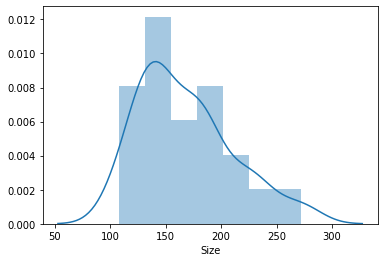

In [29]:
distribution_data = df_2[ df_2["Group"] == "TCP-N"]
dist_data = distribution_data["Size"]
sns.distplot(dist_data)

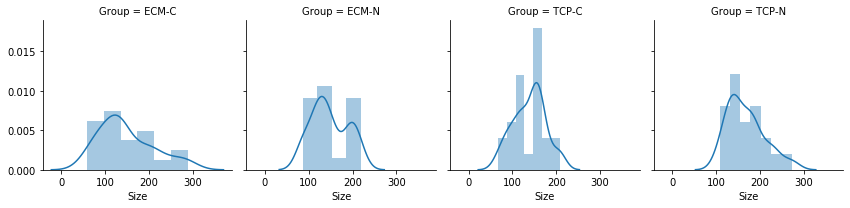

In [30]:
g = sns.FacetGrid(df_2, col="Group")
g.map(sns.distplot, "Size")